# DotPack 
使用 Python 驱动 DotPack。

使用时，需打开电脑蓝牙。

## 初始化

In [ ]:
from dotpack import DotPack

pack = DotPack()

## 连接设备

In [ ]:
address = 'D95F6C1A-3C0B-3444-4652-04F7EBC8481C'
# pack.connect()  # 连接 jupyterlab 模拟器
pack.connect(address)  # 输入书包 address 可连接到书包

In [ ]:
pack.clear()

## 点亮第一个 led
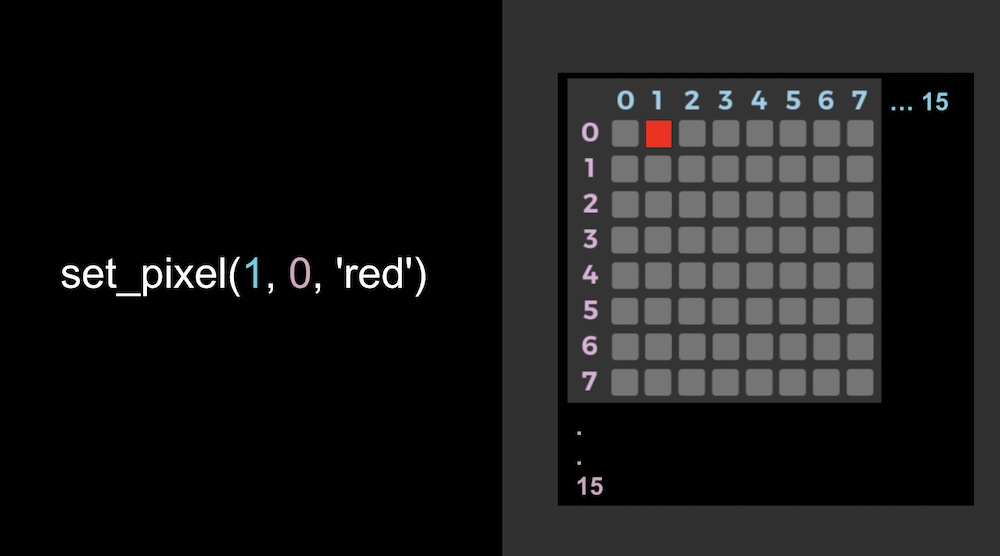

In [ ]:
# 点亮第一个led
pack.set_pixel(1, 0, 'red') # pack.set_pixel(0, 0, (255,0,0))

## 查询pixel状态

In [ ]:
# 查询像素, renturn RGB tuple
pack.get_pixel(1, 0)

## 清理画布

In [ ]:
pack.clear()

## 显示中文
<!--
macos: 可能需要下载 simhei 字体， 或者使用 PingFang 字体

emoji: Symbola
需要自行下载 Symbola 字体
    macos 下载的字体(Symbola.otf)放到 ~/Library/Fonts/
-->

### 中文字符
每次显示1个字符

In [ ]:
pack.display_char_zh('早', color="red")

## emoji 字符
每次显示1个字符

<!--内置在Adapter里？-->

In [ ]:
pack.display_emoji('🐳')

## 全屏颜色

In [ ]:
color = (255, 0, 0) # red (RGB), 通过调整 RGB 的数值调整亮度
pack.set_color(color)

In [ ]:
# 随机变色
import time
import random
for i in range(10):
    time.sleep(0.3)
    brightness = 100
    power = True
    color = (random.randint(0,255), random.randint(0,255), random.randint(0,255))
    pack.set_color(color)

## 内置特效
- fire
- rainbow
- snow
- matrix
- fireflies
- arrows
- noise_ocean
- balls
- ...

**不支持模拟器，只能在硬件上运行！**

In [ ]:
# matrix
pack.set_mode('matrix')

## 加载图像
使用 PIL(Pillow) 创建自动移图像

In [ ]:
from PIL import Image

# 加载一个图像
im = Image.open('/tmp/下载.png')
im = im.resize((16, 16), Image.NEAREST)
rgb_im = im.convert('RGB')  # 转化为 RGB 模式
pack.show(rgb_im) # 显示在 jupyterlab 或 pack

# 动画(Animation) API

In [ ]:
from dotpack import Animation
animation = Animation()

In [ ]:
# pack set pixel ...  
animation.add_frame(pack) # 把 pack 当前状态(pack._img)作为 animation 的一帧
# pack set pixel ... 
animation.add_frame(pack)

## 在模拟器里展示动画

In [ ]:
animation.show(duration=0.1)

## 将动画同步到书包

In [ ]:
animation.show(to_pack=pack)

## 保存为gif

In [ ]:
animation.save(name='hello')

## 加载gif

In [ ]:
# 加载 gif, 建议使用手机 APP 设计动图。 也可参看动图网站 https://giphy.com/，或者试试表情包
animation.load('./hello.gif')

## 查看、修改某一帧

In [ ]:
animation.show_frame(FRAME_ID)
animation.remove_frame(FRAME_ID)

# 控制流（教学内容）
参考 [控制流](https://learnku.com/docs/byte-of-python/2018/control_flow/3343)

在 DotPack 上阐述控制流.

In [ ]:
# 顺序执行
import time
pack.clear() # 清空屏幕
pack.set_color('red')
time.sleep(1)
pack.set_color('green')
time.sleep(1)
pack.set_color('blue')

In [ ]:
# if
color = input('输入你喜欢的颜色:')
if color == '红色':
    pack.set_color('red')
if color == '绿色':
    pack.set_color('green')
if color == '蓝色':
    pack.set_color('blue')

In [ ]:
# while
while True:
    color = input('输入你喜欢的颜色:')
    if color == '红色':
        pack.set_color('red')
    if color == '绿色':
        pack.set_color('green')
    if color == '蓝色':
        pack.set_color('blue')

In [ ]:
# for
for i in range(3):
    print(i)
    color = input('输入你喜欢的颜色:')
    if color == '红色':
        pack.set_color('red')
    if color == '绿色':
        pack.set_color('green')
    if color == '蓝色':
        pack.set_color('blue')
print("结束")

In [ ]:
# 点亮一颗
pack.clear()
pack.set_pixel(0, 0, 'red')  # x, y

In [ ]:
# 换个颜色
pack.clear()
pack.set_pixel(0, 0, 'blue')  # x, y

In [ ]:
# 三颗星
pack.clear()
pack.set_pixel(0, 0, 'red')  # x, y
pack.set_pixel(1, 0, 'red')  # x, y
pack.set_pixel(2, 0, 'red')  # x, y

In [ ]:
# 点亮一排
pack.clear()
for i in range(16):
    pack.set_pixel(i, 0, 'red')  # x, y

In [ ]:
# 点亮一排 颜色间隔
pack.clear()
for i in range(16):
    if i % 2 == 0:
        pack.set_pixel(i, 0, 'red')  # x, y
    else:
        pack.set_pixel(i, 0, 'blue')  # x, y

In [ ]:
# 点亮斜边
pack.clear()
for i in range(16):
    for j in range(16):
        if i == j:
            pack.set_pixel(i,j, 'red')

In [ ]:
# 点亮斜边 颜色间隔
pack.clear()
for i in range(16):
    for j in range(16):
        if i == j:
            if i % 2 == 0:
                pack.set_pixel(i,j, 'red')
            else:
                pack.set_pixel(i,j, 'blue')

## 获取状态

In [ ]:
pack.set_pixel(1,1, "red")
pack.get_pixel(1,1)  # (255, 0, 0)

In [ ]:
import time
pack.set_pixel(1,1, "red")
r, g, b = pack.get_pixel(1,1)

while r > 20:
    r = int(r / 1.1)  # 红色不断衰减
    pack.set_pixel(1,1, (r, g, b))
    time.sleep(0.1)
print(r)

## 往下掉的草莓
使用 PIL 创建新图像，注意x, y坐标相反

In [ ]:
pack.display_emoji('🍓')

In [ ]:
from PIL import Image

img_pil = Image.new(mode='RGB', size=(16, 16))
for x in range(16):
    for y in range(16):
        color = pack.get_pixel(x, y)
        x_pil, y_pil = x, y
        y_pil = y_pil + 7  # 掉落 7 格
        if y_pil <= 15:
            # 有效像素
            img_pil.putpixel((x_pil, y_pil), color)  
pack.show(img_pil)

## 保存图像

In [ ]:
pack.display_emoji('🍇')
file_path = pack.save('葡萄')

## 函数: 笑脸 😊

In [ ]:
def smile():
    pack.clear()
    eye = 'red'
    mouth = 'blue'
    pack.set_pixel(4, 3, eye)
    pack.set_pixel(11, 3, eye)

    pack.set_pixel(3, 10, mouth)
    pack.set_pixel(12, 10, mouth)

    pack.set_pixel(4, 11, mouth)
    pack.set_pixel(5, 11, mouth)
    pack.set_pixel(6, 11, mouth)
    pack.set_pixel(7, 11, mouth)
    pack.set_pixel(8, 11, mouth)
    pack.set_pixel(9, 11, mouth)
    pack.set_pixel(10, 11, mouth)
    pack.set_pixel(11, 11, mouth)

smile()

In [ ]:
# 参数
def smile(eye, mouth):
    pack.clear()
    pack.set_pixel(4, 3, eye)
    pack.set_pixel(11, 3, eye)

    pack.set_pixel(3, 10, mouth)
    pack.set_pixel(12, 10, mouth)

    pack.set_pixel(4, 11, mouth)
    pack.set_pixel(5, 11, mouth)
    pack.set_pixel(6, 11, mouth)
    pack.set_pixel(7, 11, mouth)
    pack.set_pixel(8, 11, mouth)
    pack.set_pixel(9, 11, mouth)
    pack.set_pixel(10, 11, mouth)
    pack.set_pixel(11, 11, mouth)

smile('blue', 'red')